#### **Least Squares Regression line**

In this code we will explore how to create a basic lineal regression "manually", this is, without using any built in function in Python. I don't pretend to make this code more efficient or better by any means... I just want to do this exercise to better understand the underlying beautiful maths behind a linear regression. I won't even use a "mean" function, the idea is to do everything as manual as the code allows it.

The aim of a linear regression is to establish the potential correlation between a variable (or multiple variables) and a dependent variable. The line can be then used to predict values that are not in the initial dataset.

The method uses the **least squares method**, which basically aims to minimise the sum of the vertical distance between all of the data points and the line of best fit. This is kind of create the line that fits better the available data. 

To create this line we just need to estimate this simple linear equation:

$$
\hat{y} = a + b x
$$
where:<br>
- $\hat{y}$ is the predicted value of $y$
- $ a = \bar{y} - b \bar{x} $  
- $ b = \frac{S_{xy}}{S_{xx}} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2} = \frac{\sum (xy) - \frac{\sum x \sum y}{n}}{\sum (x^2) - \frac{(\sum x)^2}{n}} $  
- $ \bar{x} = \frac{\sum x}{n}, \quad \bar{y} = \frac{\sum y}{n}$

More info on the underlying math:<br>
https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/simple-linear-regression.html

In [82]:
# Define the variables
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [3, 3, 5, 15, 4, 1, 4, 20, 2, 12]

# Start off by working out the mean of the independent and dependent variables.
mean_X = sum(X) / len(X)
mean_y = sum(y) / len(y)

# Now calculate b (the slope of the regression line) with least squares method
numerator = sum((X[i] - mean_X) * (y[i] - mean_y) for i in range(len(X)))
denominator = sum((X[i] - mean_X) ** 2 for i in range(len(X)))
b = numerator / denominator

# Calculate a (the y-intercept of the regression line)
a = mean_y - b * mean_X

a (intercept): 6.6
b (slope): 0.5272727272727272
y = 6.60 + 0.53 * x


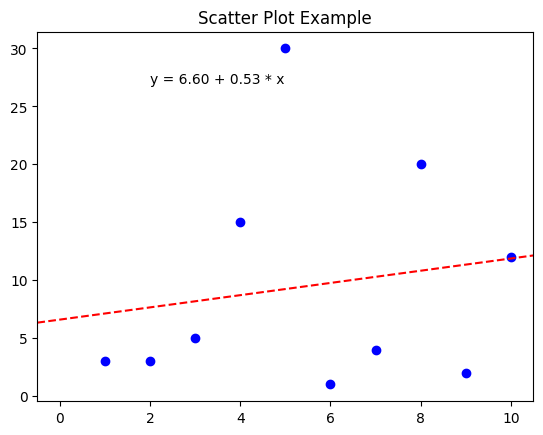

In [81]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X, y, color='blue', label='Data Points')
plt.title('Scatter Plot Example')

# Generate x-values for the line (min to max of X)
x_line = np.linspace(min(X), max(X), 100)
y_line = a + b * x_line  # Use the calculated slope and intercept on X

# Print the values mostly for debugging purposes
print(f"a (intercept): {a}")
print(f"b (slope): {b}")
print(f"y = {a:.2f} + {b:.2f} * x")

# Show the pretty equation on the plot
plt.text(2, max(y)-3, f"y = {a:.2f} + {b:.2f} * x")

# Plot the line. We specify the source (x=0, y=a=intercept, and the slope)
plt.axline(xy1=(0, a), slope=b, color='red', linestyle='--', label='Regression Line')
plt.show()

I have to ackowledge that I feel so excited now. Let's now asses the model. For that purpose we have several metrics at our disposal. We will focus on R squared now, it tells us how much of the variation in y is explained by x. In other words, how well our line fits the model.
<br><br>



$$
R^2 = 1 - \frac{\text{sum squared regression (SSR)}}{\text{total sum of squares (SST)}} = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

<br>More info on the underlying math and interpreting the results:<br>
https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html

In [ ]:
# Find the residuals for each point
residuals = []

for i in range(len(X)):
    # Find the predicte Y value by the regression line
    predicted_y = a + b * X[i]

    # Calculate the residual and add it to the list
    residuals.append(y[i] - predicted_y)

# We can calculate the formula now ∑(y_i - ŷ_i)² = ∑ r_i² (numerator of the R2 formula)
sum_of_squares = sum(r ** 2 for r in residuals)

# Now we can finalize ∑(y_i - ȳ)² (denominator of the R2 formula)
total_sum_of_squares = sum((y[i] - mean_y) ** 2 for i in range(len(y))) 

# Finally, we can calculate R²
R_squared = 1 - (sum_of_squares / total_sum_of_squares)

# Print the R² value. The closer to 1, the better the fit of the model.
print(f"R²: {R_squared:.4f}")


R²: 0.0276
